## maximum likelihood

Lets first generate some data.  The data is a sine function with some noise -- just in the y-direction. 


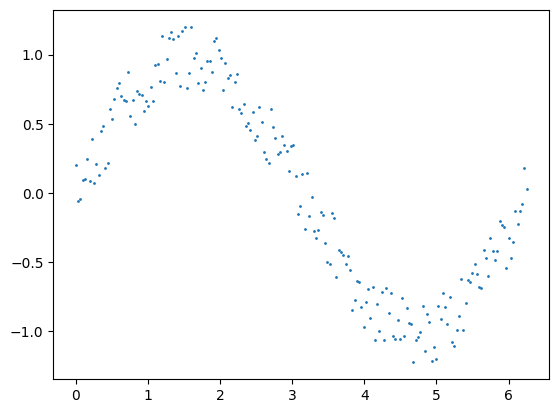

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,2*np.pi,0.01*np.pi)
y = np.sin(x) + (0.5*np.random.random(x.size)-0.25)

plt.scatter(x,y,s=1)
plt.show()

### Fitting a polynomial

Lets try to fit a polynomial to it.  As an exercise in figuring out how to do it.  Lets look up numpy polyfit and see if you can figure out how to 
1. create a polynomial fit degree, ndeg -- currently set to 3
2. plot it. 
3. increase the upper bound beyond $2\pi$ and see what this produces.

NameError: name 'y_test' is not defined

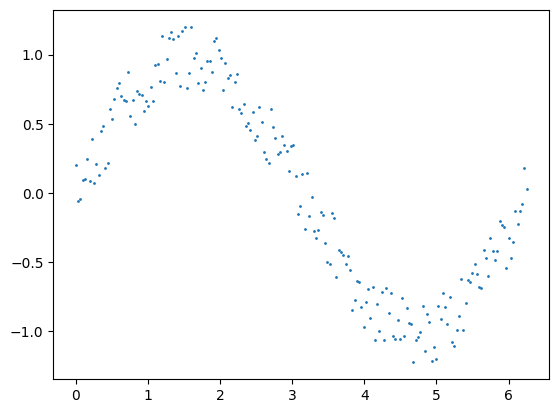

In [4]:
ndeg = 3

x_test = np.arange(0,2*np.pi,0.01*np.pi)
# create a polynomial fit of degree 3 and plot it as x_test, y_test

plt.scatter(x,y,s=1)
plt.plot(x_test,y_test)
plt.show()

The thing is that we know the underlying function is a sine wave, so lets try to fit a sine wave to it and gets the estimated/best-fit parameters. 

In [ ]:
import scipy.optimize as so

def fit_func(x,parameters):
    pass

def compute_residuals(parameters, xdata, ydata,sigma=0.25) : 
    pass

lstsq = so.least_squares(compute_residuals, x0=[4,1], args=[x,y])


#compute the chi squared

print( chi_sq)

plt.plot(x,fit_func(x, lstsq.x))
plt.scatter(x,y,s=1)

plt.show()

The biggest use of MCMC is its application to model fitting especially in the context of Bayesian modeling.  Usually in this case, we are concerned about the computation of the posterior distribution function $\pi(\vec{\theta};\vec{x})$ of parameters $\vec{\theta}$ given some data $\vec{x}$ and a prior $\pi(\vec{\theta})$.  We do this via Bayes' theorem
$$
\pi(\vec{\theta};\vec{x}) = \frac{\pi(\vec{\theta})p(\vec{x};\vec{\theta})}{p(\vec{x})}
$$
where $p(\vec{x};\vec{\theta})$ is a likelihood function and $p(\vec{x}) = \int \pi(\vec{\theta})p(\vec{x};\vec{\theta})d\vec{\theta}$ is essentially the normalization.  This is the exact same problem that we encountered earlier where we needed to compute the expectation value of the energy in the Ising model.  However, in some ways this is simplier as the special substitutions are avoided in this case.  In essence, we want to compute
$$
p(\vec{x}) = \int \pi(\vec{\theta})p(\vec{x};\vec{\theta})d\vec{\theta}
$$
The key is that we only want to compute over the values of $\theta$ that really contribute.  So we can define a Metropolis algorithm that goes for this as
\begin{enumerate}
    \item Begin with some parameter set $\vec{\theta}_1$ 
    \item Compute the joint likelihood $L_1 = \pi(\vec{\theta}_1)p(\vec{x};\vec{\theta}_1)$
    \item Pick a random proposal $\vec{\theta}_2$ from a distribution based on the priors.
    \item Compute the likelihood $L_2 = \pi(\vec{\theta}_2)p(\vec{x};\vec{\theta}_2)$
    \item Compute the transition probability $R = L_2/L_1$
    \item Accept the proposal with probability $R$
\end{enumerate}

Now to make contact with the problem in the Ising model where we computed the expectation value of the energy, let me consider the computation of the expectation values of the parameters $\vec{\theta}$ over the distribution given by the posterior distribution, $\pi(\vec{\theta};\vec{x})$ or
$$
\left<\vec{\theta}\right>_{\pi} = \int \vec{\theta}\pi(\vec{\theta};\vec{x}) d\vec{\theta} 
$$
Now the analogue with the ising model is much clearer now.  If I compute this value, I get the expected value of the parameters.  Just as in the Ising model I get the expected value of the energy when integrating over a Maxwell-Boltzmann distribution.  Here I am integrate over the posterior distribution of the parameters.  

Thus I can use MCMC for this.  A subtle, but important point is that when I take the average over the entire Markov chain, then the values of the parameters should reduce to the expected value.  However, if I take the distribution of the parameters, i.e., take a histogram of the values of the parameters in the chain, the distribution of the parameters is the posterior distribution.  This is a subtle, but important point and in case you ever wondered how these parameters distributions for various models where ever generated, now you know. 

Lets solidify our understanding with a ``simple'' example.  Let us consider our noisy sin wave as before, which we reproduce for clarity

Now we will define a log-likelihood function
$$
\log p(\vec{y}; \vec{\theta}) = -\sum_i\left(\frac{y_i - \theta_0\sin(t_i + \theta_1)}{\sigma}\right)^2,
$$


In [ ]:
def log_likelihood(func, t, y, x, sigma=1) :
    pass

We need to set some priors. Lets set $\theta_0$ to be a flat distribution between 1 and 10 and $\theta_1$ to be a flat distribution between 0 and $2\pi$.  

In [ ]:
def priors( x) : 
    if(x[0] < 1 or x[0] > 10) : 
        return 0
    if(x[1] < 0 or x[1] > 2*np.pi) : 
        return 0
    return 1  


We need to define a move

In [ ]:
def move(func, t, y, x, h = 0.1, TINY=1e-30) :
    pass

In [ ]:
def mcmc(func, t, y, x, burn_in=1000, MAX_CHAIN=500000) :
    xchain = [] 
    i = 0

    for j in range(MAX_CHAIN) : 
        x, accepted_move = move(func, t, y, x)
    if( accepted_move) :
        i += 1 
        if( i > burn_in) : 
            xchain.append(x)
    return np.array(xchain)
